<img align=right src="https://github.com/aaron-oz/INMAS-Workshop-02/blob/main/images/inmas.png?raw=1" width=130x />

# Notebook 03a - Multiple Linear Regression

Material covered in this notebook:

This notebook follows along the notes [here](notes/3_MultipleLinearRegression.pdf)


### Prerequisite
Notebook 02

------------------------------------

In [115]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import pandas as pd

In [116]:
data = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/master/openintro/evals.csv")
display(data)

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
1,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
2,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
3,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
4,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3.000,not formal,color
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,4.5,tenure track,not minority,male,english,32,60.46511,52,86,upper,...,multi credit,6,6,9,7,8,5,6.833,not formal,color
459,3.5,tenure track,minority,female,non-english,42,57.14286,48,84,upper,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
460,4.4,tenure track,minority,female,non-english,42,77.61194,52,67,upper,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
461,4.4,tenure track,minority,female,non-english,42,81.81818,54,66,upper,...,multi credit,3,8,7,4,6,4,5.333,not formal,color


## Course Evaluation Dataset

This data is part of the [OpenIntro resources](https://www.openintro.org/book/statdata/?data=evals).

"The data are gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rate the professors' physical appearance. The result is a data frame where each row contains a different course and each column has information on either the course or the professor."

####Variables
- score: Average professor evaluation score: (1) very unsatisfactory - (5) excellent.
- rank: Rank of professor: teaching, tenure track, tenured.
- ethnicity: Ethnicity of professor: not minority, minority.
- gender: Gender of professor: female, male.
- language: Language of school where professor received education: English or non-English.
- age: Age of professor.
- cls_perc_eval: Percent of students in class who completed evaluation.
- cls_did_eval: Number of students in class who completed evaluation.
- cls_students: Total number of students in class.
- cls_level: Class level: lower, upper.
- cls_profs: Number of professors teaching sections in course in sample: single, multiple.
- cls_credits: Number of credits of class: one credit (lab, PE, etc.), multi credit.
- bty_f1lower: Beauty rating of professor from lower level female: (1) lowest - (10) highest.
- bty_f1upper: Beauty rating of professor from upper level female: (1) lowest - (10) highest.
- bty_f2upper: Beauty rating of professor from second level female: (1) lowest - (10) highest.
- bty_m1lower: Beauty rating of professor from lower level male: (1) lowest - (10) highest.
- bty_m1upper: Beauty rating of professor from upper level male: (1) lowest - (10) highest.
- bty_m2upper: Beauty rating of professor from second upper level male: (1) lowest - (10) highest.
- bty_avg: Average beauty rating of professor.
- pic_outfit: Outfit of professor in picture: not formal, formal.
- pic_color: Color of professor’s picture: color, black & white.

### Is there a difference in the mean course evaluation score between female and male instructors?

<Axes: xlabel='gender', ylabel='score'>

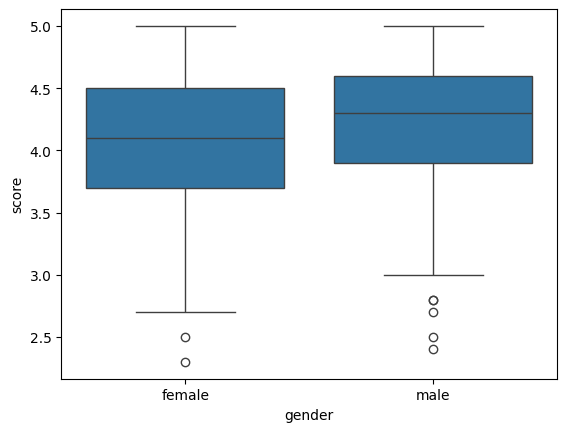

In [117]:
sbn.boxplot(data = data,
            x="gender",
            y="score")
#sbn.pairplot(data); ## this will take awhile

# Simple Linear Regression

### Is there a statistically significant linear relationship between the beauty score and the course evaluation score?

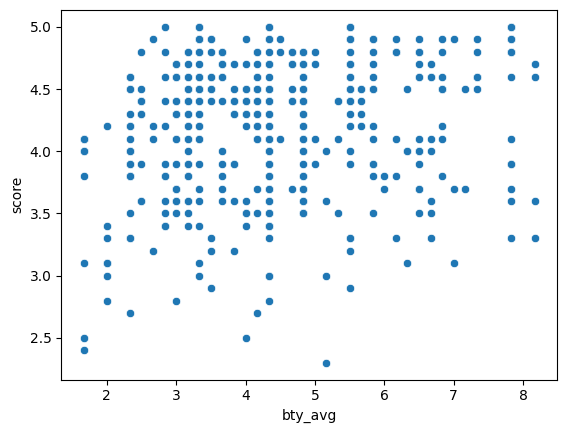

In [118]:
sbn.scatterplot(data=data,  x="bty_avg", y="score");

Fit a linear regression model and make a conclusion. Don't forget to check the conditions! (Slide 8, page 4 of Simple Linear Regression Notes)



# Multiple Regression with Binary Categorical Variable

### Is there a difference in the mean course evalution score between female and male instructors after accounting for the beauty score?

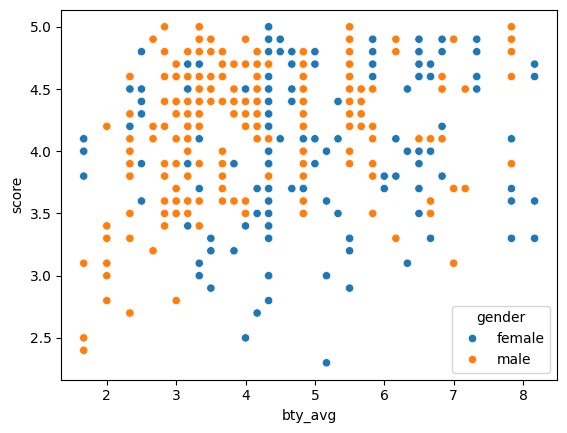

In [119]:
sbn.scatterplot(data=data,  x="bty_avg", y="score", hue = 'gender');

In [120]:
# Specify the model
model_formulation = smf.ols("score ~ bty_avg + gender", data = data)

# Fit the model
results = model_formulation.fit()

# View parameters
results.params

,0
Intercept,3.747338
gender[T.male],0.172390
bty_avg,0.074155


## Parallel Slopes Model Summary

Which coefficient should we do inference on to answer our question of interest?

In [121]:
model_summary = results.summary()
print(model_summary)

model_anova = sm.stats.anova_lm(results)
print(model_anova)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           8.18e-07
Time:                        20:24:09   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7473      0.085     44.

### Parallel Slopes Predicted Values

In [122]:
# Retrieve beta estimates from statsmodels
beta_hat = results.params

# split into groups
males = data[data.gender == "male"]
#males.info()

females = data[data.gender == "female"]
#females.info()

# Compute estimates
Y_hat_M = beta_hat[0] + beta_hat[1] + males.bty_avg*beta_hat[2]
Y_hat_F = beta_hat[0] + females.bty_avg*beta_hat[2]



<ipython-input-122-9ad6d062ea5b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_hat_M = beta_hat[0] + beta_hat[1] + males.bty_avg*beta_hat[2]
<ipython-input-122-9ad6d062ea5b>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_hat_F = beta_hat[0] + females.bty_avg*beta_hat[2]


In [123]:
males['predVal'] = Y_hat_M
females['predVal'] = Y_hat_F



<ipython-input-123-2719e7780584>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['predVal'] = Y_hat_M
<ipython-input-123-2719e7780584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females['predVal'] = Y_hat_F


<Axes: xlabel='bty_avg', ylabel='score'>

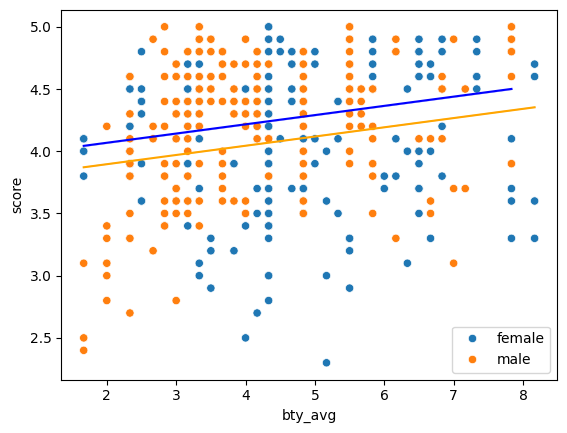

In [124]:
# Show data points
sbn.scatterplot(data=data,  x="bty_avg", y="score", hue = 'gender');

# Graph the line of best fit
sbn.lineplot(data = males, x="bty_avg", y='predVal', color='blue')
sbn.lineplot(data = females, x="bty_avg", y='predVal', color='orange')

### Parallel Slopes Residuals

We still can't forget to check the residuals. What condition does the following code chunk assess? Do you believe the condition is met?

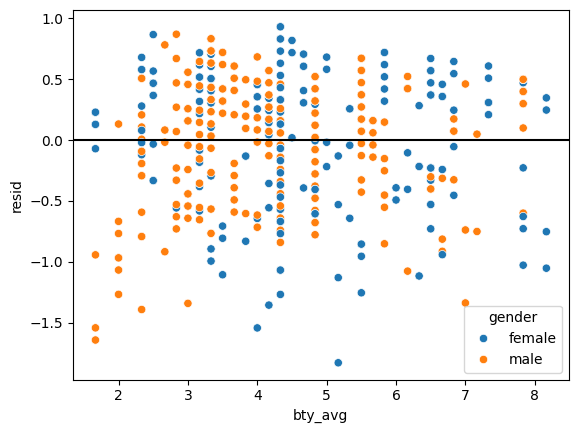

In [125]:
residuals = results.resid
data['resid'] = residuals

plot = sbn.scatterplot(data=data,  x="bty_avg", y="resid", hue = 'gender');
plot.axhline(y=0, color = 'black')

What condition does the following code chunk assess? Do you believe the condition is met?

In [126]:
results.resid.mean()

-1.9672288755993055e-15

What condition does the following code chunk assess? Do you believe the condition is met?

<ipython-input-127-5d1315399470>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(residuals, fit=stats.norm, ax=ax1)
<ipython-input-127-5d1315399470>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  _ = stats.probplot(residuals.ravel(), plot=ax2)


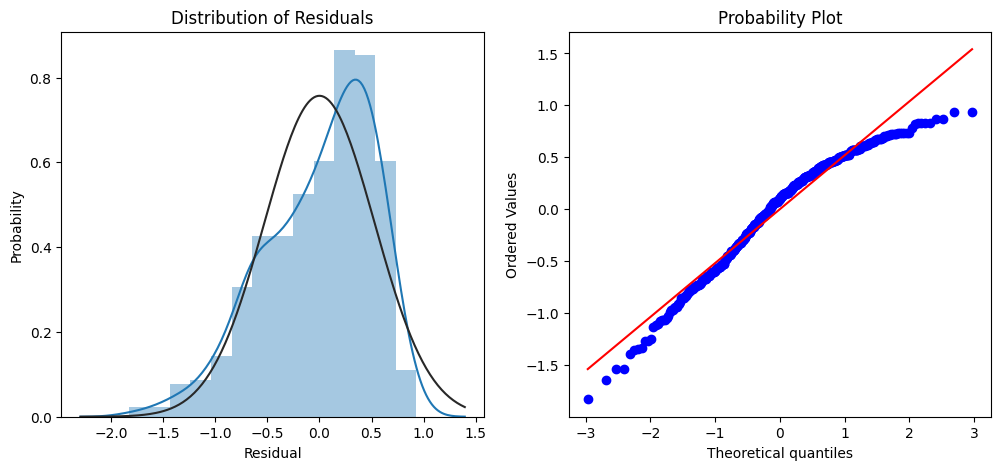

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sbn.distplot(residuals, fit=stats.norm, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
_ = stats.probplot(residuals.ravel(), plot=ax2)

### Is the relationship between beauty score and course evaluation score the same for female and male instructors?

In [128]:
# Specify the model
model_formulation = smf.ols("score ~ bty_avg * gender", data = data)

# Fit the model
results = model_formulation.fit()

# View parameters
results.params

,0
Intercept,3.950060
gender[T.male],-0.183509
bty_avg,0.030643
bty_avg:gender[T.male],0.079619


### Interaction Model Summary

Which coefficient should we do inference on to answer our question of interest?

In [129]:
model_summary = results.summary()
print(model_summary)

model_anova = sm.stats.anova_lm(results)
print(model_anova)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     11.74
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           2.00e-07
Time:                        20:24:12   Log-Likelihood:                -357.35
No. Observations:                 463   AIC:                             722.7
Df Residuals:                     459   BIC:                             739.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

### Interaction Predicted Values

In [130]:
# Retrieve beta estimates from statsmodels
beta_hat = results.params

# Compute estimates
Y_hat_M2 = beta_hat[0] + beta_hat[1] + males.bty_avg*(beta_hat[2] + beta_hat[3])
Y_hat_F2 = beta_hat[0] + females.bty_avg*beta_hat[2]

males['predVal2'] = Y_hat_M2
females['predVal2'] = Y_hat_F2

<ipython-input-130-a4d59a9b83e8>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_hat_M2 = beta_hat[0] + beta_hat[1] + males.bty_avg*(beta_hat[2] + beta_hat[3])
<ipython-input-130-a4d59a9b83e8>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_hat_F2 = beta_hat[0] + females.bty_avg*beta_hat[2]
<ipython-input-130-a4d59a9b83e8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<Axes: xlabel='bty_avg', ylabel='score'>

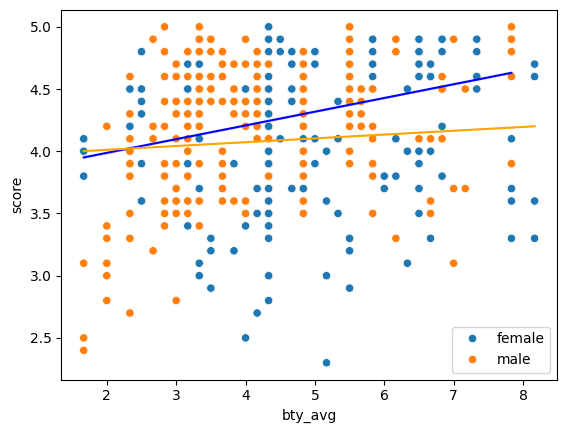

In [131]:
# Show data points
sbn.scatterplot(data=data,  x="bty_avg", y="score", hue = 'gender');
# Graph the line of best fit
sbn.lineplot(data = males, x="bty_avg", y='predVal2', color='blue')
sbn.lineplot(data = females, x="bty_avg", y='predVal2', color='orange')

### Interaction Residuals

Are the conditions for inference met?

<ipython-input-132-b4c631eac32a>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(residuals, fit=stats.norm, ax=ax1)
<ipython-input-132-b4c631eac32a>:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  _ = stats.probplot(residuals.ravel(), plot=ax2)


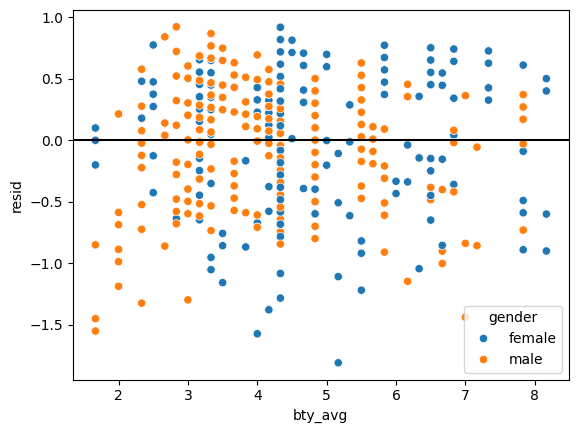

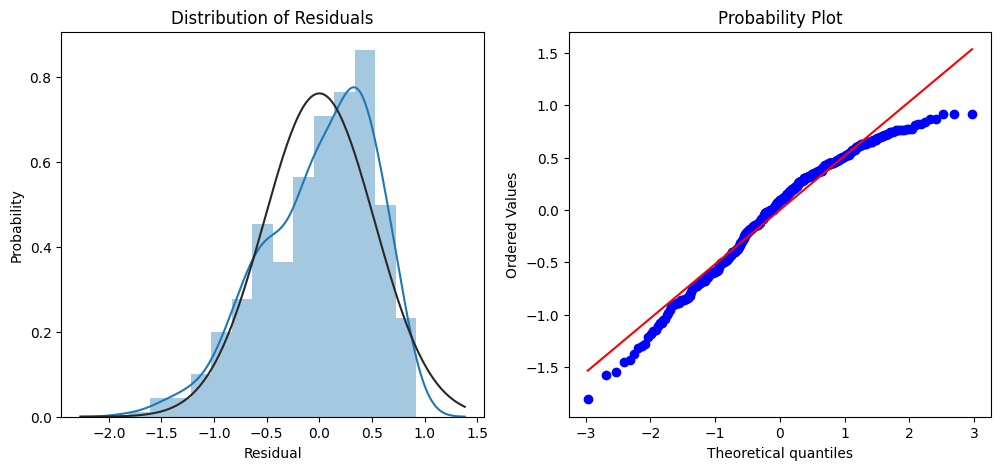

In [132]:
residuals = results.resid
data['resid'] = residuals

plot = sbn.scatterplot(data=data,  x="bty_avg", y="resid", hue = 'gender');
plot.axhline(y=0, color = 'black')

results.resid.mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sbn.distplot(residuals, fit=stats.norm, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
_ = stats.probplot(residuals.ravel(), plot=ax2)

# Multiple Regression with Categorical Variable with more than two levels

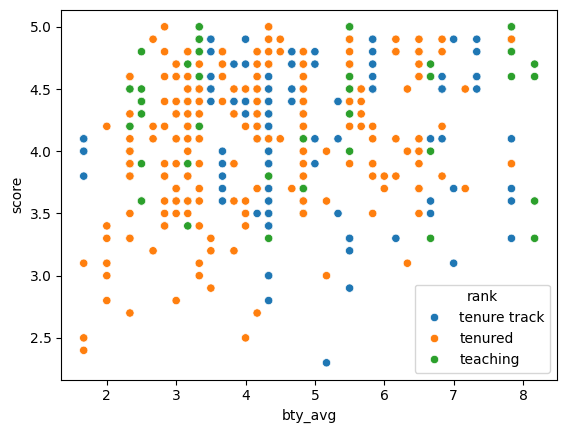

In [133]:
sbn.scatterplot(data=data,  x="bty_avg", y="score", hue = 'rank');

What statistical question can we ask using the variables displayed here?

In [134]:
# Specify the model
model_formulation = smf.ols("score ~ bty_avg * rank", data = data)

# Fit the model
results = model_formulation.fit()

# View parameters
results.params

,0
Intercept,4.098110
rank[T.tenure track],-0.018847
rank[T.tenured],-0.409105
bty_avg,0.041713
bty_avg:rank[T.tenure track],-0.026399
bty_avg:rank[T.tenured],0.065859


What do you conclude about your question of interest?

In [135]:
model_summary = results.summary()
print(model_summary)

model_anova = sm.stats.anova_lm(results)
print(model_anova)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.701
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           4.09e-05
Time:                        20:24:15   Log-Likelihood:                -360.47
No. Observations:                 463   AIC:                             732.9
Df Residuals:                     457   BIC:                             757.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [136]:
# Retrieve beta estimates from statsmodels
beta_hat = results.params

# split into groups
#tt = data[data.rank == 'tenure track']
tt = data.loc[data['rank'] == 'tenure track']
tn = data.loc[data['rank'] == "tenured"]
te = data.loc[data['rank'] == "teaching"]

# Compute estimates
Y_hat_TT = beta_hat[0] + beta_hat[1] + tt.bty_avg*(beta_hat[3] + beta_hat[4])
Y_hat_TN = beta_hat[0] + beta_hat[2] + tn.bty_avg*(beta_hat[3] + beta_hat[5])
Y_hat_TE = beta_hat[0] + te.bty_avg*beta_hat[3]

tt['predVal'] = Y_hat_TT
tn['predVal'] = Y_hat_TN
te['predVal'] = Y_hat_TE

<ipython-input-136-6f62d8a9b3c3>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_hat_TT = beta_hat[0] + beta_hat[1] + tt.bty_avg*(beta_hat[3] + beta_hat[4])
<ipython-input-136-6f62d8a9b3c3>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_hat_TN = beta_hat[0] + beta_hat[2] + tn.bty_avg*(beta_hat[3] + beta_hat[5])
<ipython-input-136-6f62d8a9b3c3>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_hat_TE = beta_hat[0] + te.bty

<Axes: xlabel='bty_avg', ylabel='score'>

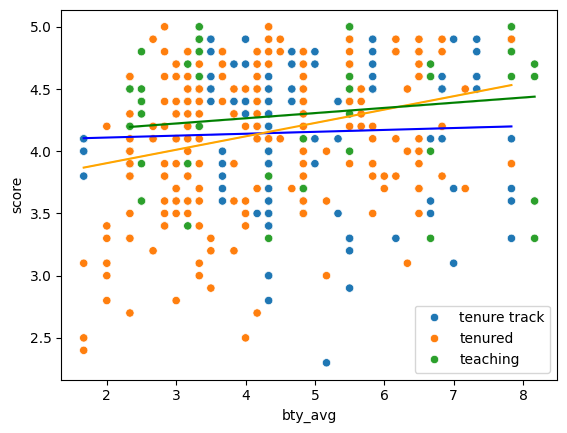

In [137]:
# Show data points
sbn.scatterplot(data=data,  x="bty_avg", y="score", hue = 'rank');
# Graph the line of best fit
sbn.lineplot(data = tt, x="bty_avg", y='predVal', color='blue')
sbn.lineplot(data = tn, x="bty_avg", y='predVal', color='orange')
sbn.lineplot(data = te, x="bty_avg", y='predVal', color='green')

<ipython-input-138-7ce6f31ed173>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(residuals, fit=stats.norm, ax=ax1)
<ipython-input-138-7ce6f31ed173>:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  _ = stats.probplot(residuals.ravel(), plot=ax2)


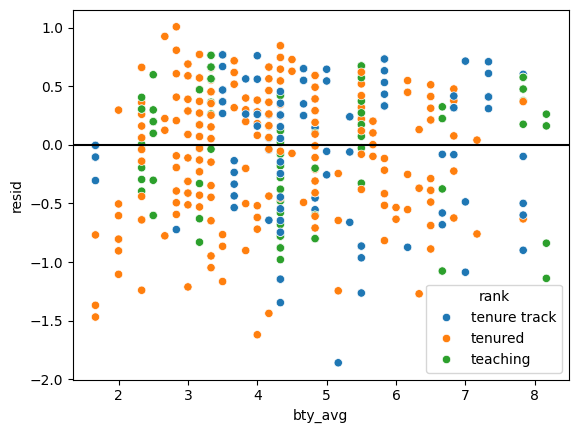

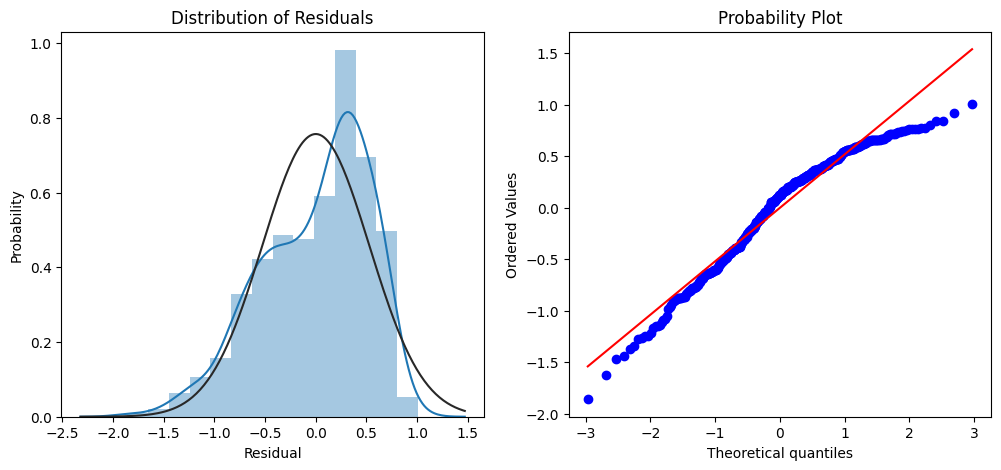

In [138]:
residuals = results.resid
data['resid'] = residuals

plot = sbn.scatterplot(data=data,  x="bty_avg", y="resid", hue = 'rank');
plot.axhline(y=0, color = 'black')

results.resid.mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sbn.distplot(residuals, fit=stats.norm, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
_ = stats.probplot(residuals.ravel(), plot=ax2)

# Multiple Regression with Multiple Quantitative Variables

### Is there a statistically significant linear relationship between the beauty score and the course evaluation score after accounting for instructor age?

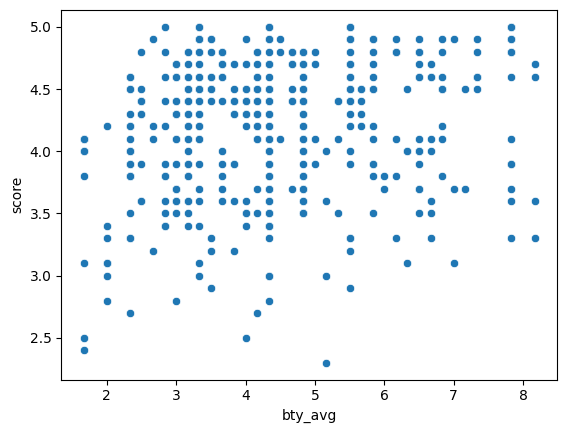

In [139]:
sbn.scatterplot(data=data,  x="bty_avg", y="score");

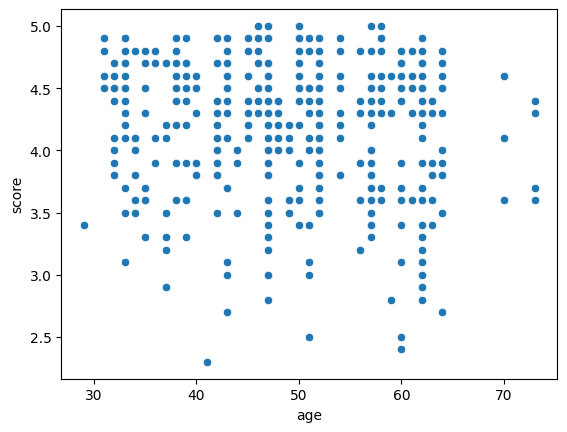

In [140]:
sbn.scatterplot(data=data,  x="age", y="score");

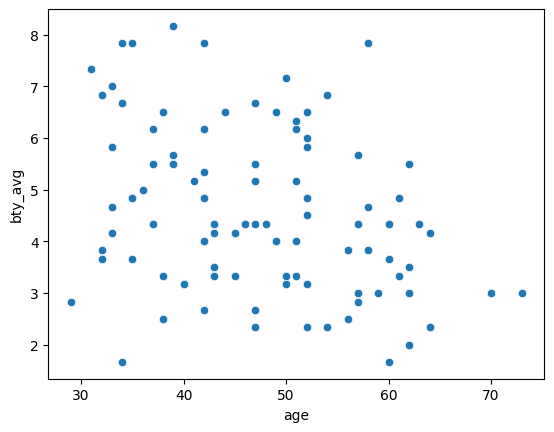

In [141]:
sbn.scatterplot(data=data,  x="age", y="bty_avg");

## Check your understanding

 Consider all of the models presented so far. What are the different elements of statistical output that can be used as evidence that the model is ``good"? Which do you find most convincing? Why?

### Multicollinearity

Do we need to worry about age and bty_avg being redundant (i.e. explain similar variability in score)?

We can compute a variance inflation factor:

$$VIF = \frac{1}{1-R^2}$$

Where R^2 is the R^2 we have seen before in a regression model of one covariate against another.

A rule of thumb is an acceptable VIF is < 5.

In [142]:
model_formulation = smf.ols("bty_avg ~ age", data = data)
model_summary = results.summary()
print(model_summary)

vif = 1/(1-0.059)
vif

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.701
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           4.09e-05
Time:                        20:24:19   Log-Likelihood:                -360.47
No. Observations:                 463   AIC:                             732.9
Df Residuals:                     457   BIC:                             757.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

1.0626992561105206

In [143]:
# Specify the model
model_formulation = smf.ols("score ~ bty_avg + age", data = data)

# Fit the model
results = model_formulation.fit()

# View parameters
results.params

,0
Intercept,4.054732
bty_avg,0.060656
age,-0.003059


In [144]:
model_summary = results.summary()
print(model_summary)

model_anova = sm.stats.anova_lm(results)
print(model_anova)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.031
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           0.000142
Time:                        20:24:19   Log-Likelihood:                -365.56
No. Observations:                 463   AIC:                             737.1
Df Residuals:                     460   BIC:                             749.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0547      0.170     23.870      0.0

<ipython-input-145-ae6f72689007>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predVal = results.params[0] + results.params[1]*data.bty_avg + results.params[2]*data.age
<ipython-input-145-ae6f72689007>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(residuals, fit=stats.norm, ax=ax1)
<ipython-input-145-ae6f72689007>:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conve

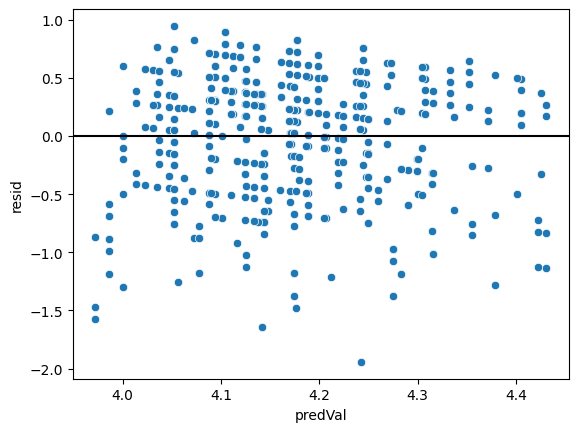

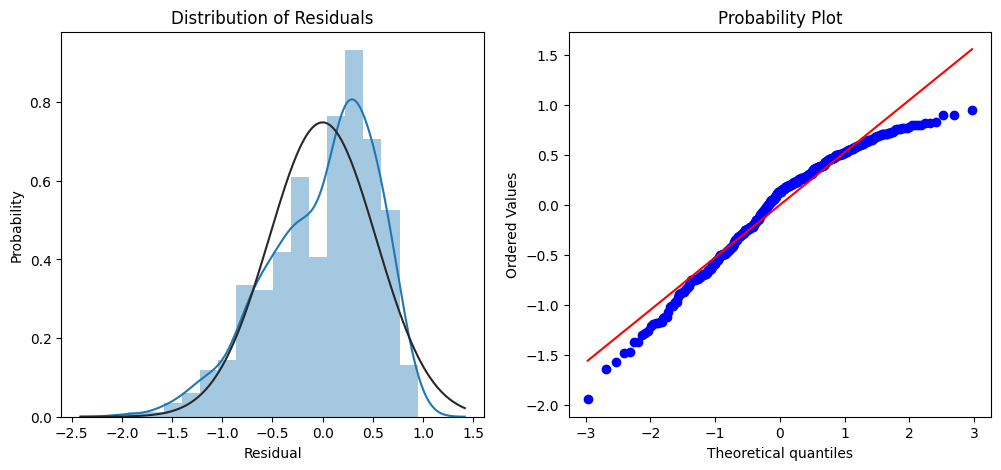

In [145]:
residuals = results.resid

data['resid'] = residuals

predVal = results.params[0] + results.params[1]*data.bty_avg + results.params[2]*data.age

data['predVal'] = predVal

plot = sbn.scatterplot(data=data,  x="predVal", y="resid");
plot.axhline(y=0, color = 'black')

results.resid.mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sbn.distplot(residuals, fit=stats.norm, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
_ = stats.probplot(residuals.ravel(), plot=ax2)